# lab11 - CNN

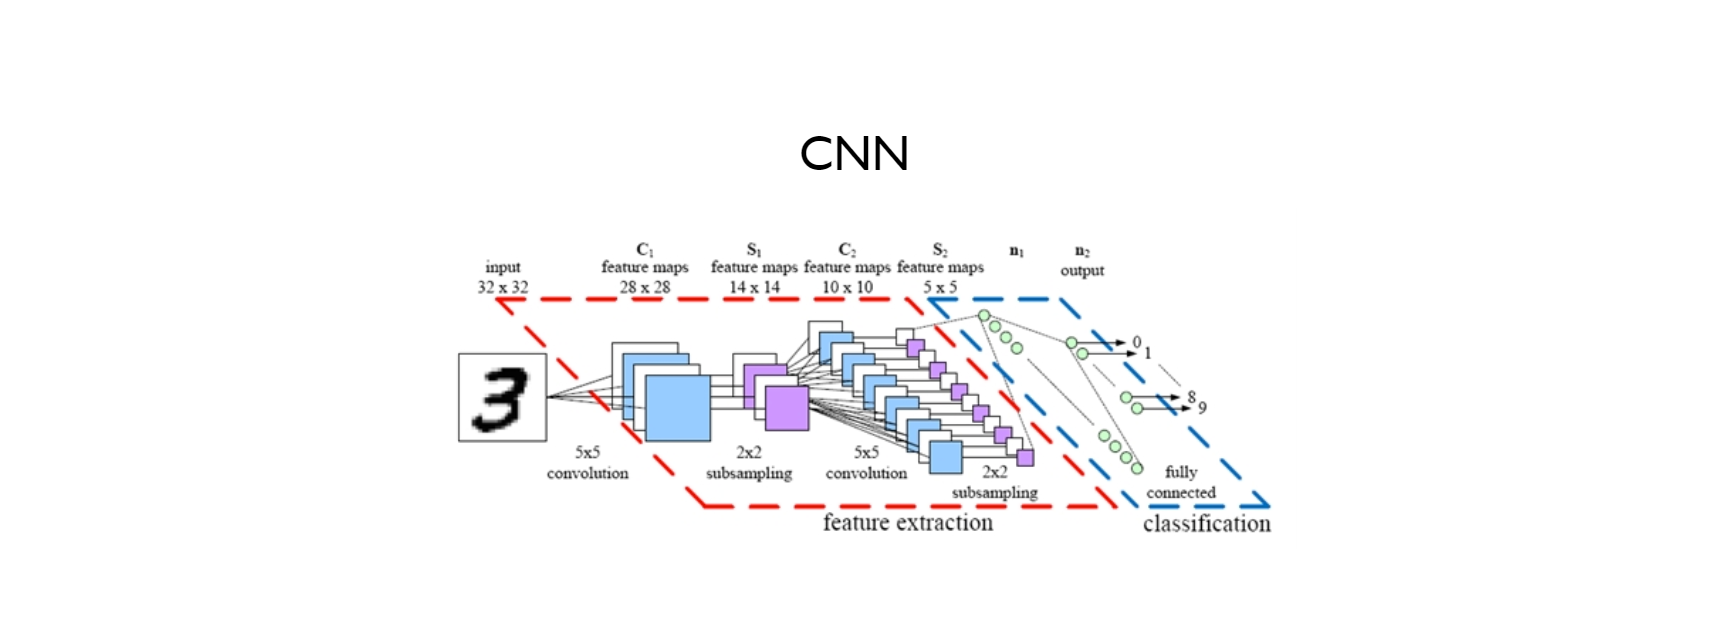

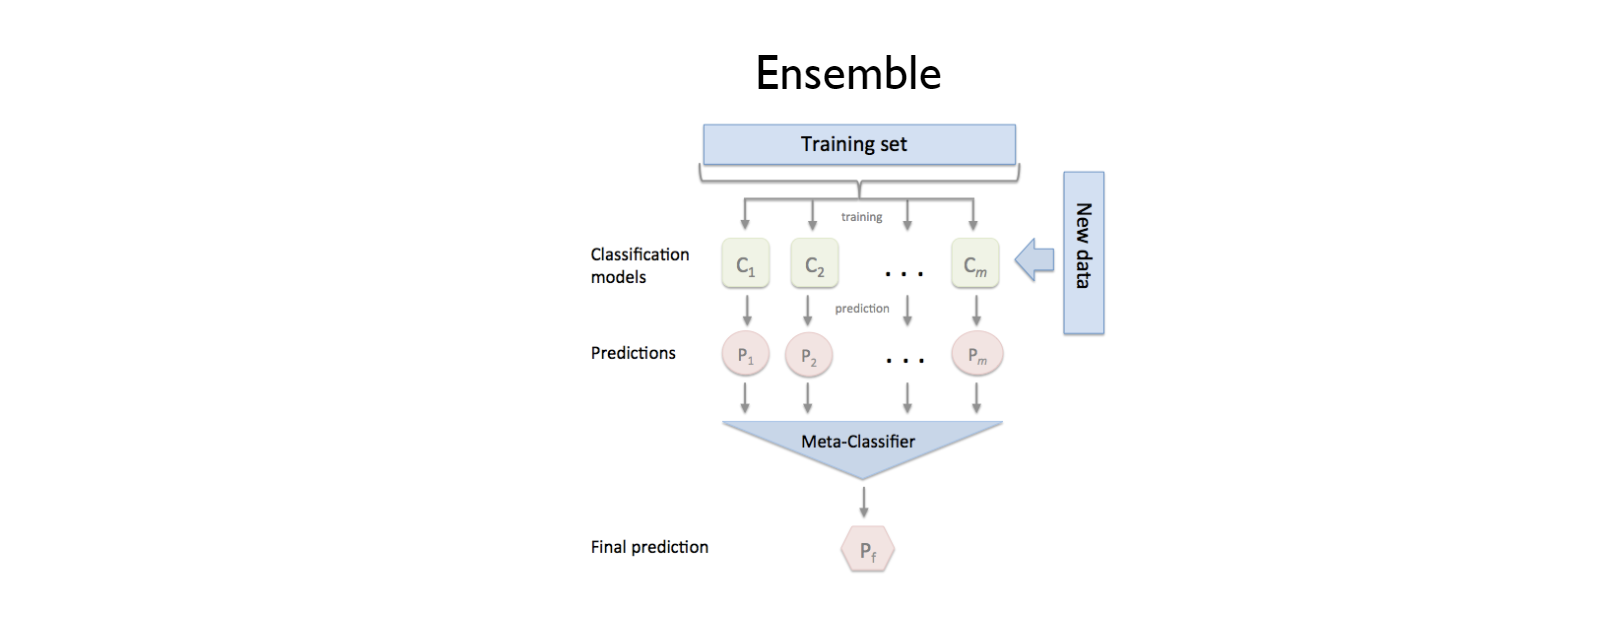

In [2]:
import numpy as np
import tensorflow as tf
import random

In [5]:
learning_rate = 0.001
training_epochs = 12
batch_size = 28
nb_classes = 10

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# nomalizing data
x_test = x_test / 255.0
x_train = x_train / 255.0

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

# one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, nb_classes)
y_test = tf.keras.utils.to_categorical(y_test, nb_classes)

tf.model = tf.keras.Sequential()
# L1
tf.model.add(tf.keras.layers.Conv2D(filters=16, 
                                    kernel_size=(3, 3), 
                                    input_shape=(x_train.shape[1], x_train.shape[2], 1), 
                                    activation='relu'))
tf.model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# L2
tf.model.add(tf.keras.layers.Conv2D(filters=32, 
                                    kernel_size=(3, 3), 
                                    activation='relu'))
tf.model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# L3 fully connected
tf.model.add(tf.keras.layers.Flatten())
tf.model.add(tf.keras.layers.Dense(units=nb_classes, 
                                   kernel_initializer='glorot_normal',
                                   activation='softmax'))

tf.model.compile(loss='categorical_crossentropy', 
                 optimizer=tf.keras.optimizers.Adam(lr=learning_rate), 
                 metrics=['accuracy'])
tf.model.summary()

tf.model.fit(x_train, y_train, batch_size=batch_size, epochs=training_epochs)

# predict 10 random hand-writing data
y_predicted = tf.model.predict(x_test)
for x in range(10):
    random_index = random.randint(0, x_test.shape[0] - 1)
    print("index: ", random_index, 
          "actual y: ", np.argmax(y_test[random_index]), 
          "predicted y: ", np.argmax(y_predicted[random_index]))

evaluation = tf.model.evaluate(x_test, y_test, return_dict=True)
print(evaluation)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                8010      
Total params: 12,810
Trainable params: 12,810
Non-trainable params: 0
__________________________________________________

## padding

In [12]:
learning_rate = 0.001
training_epochs = 12
batch_size = 28
nb_classes = 10

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# nomalizing data
x_test = x_test / 255.0
x_train = x_train / 255.0

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

# one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, nb_classes)
y_test = tf.keras.utils.to_categorical(y_test, nb_classes)

tf.model = tf.keras.Sequential()
# L1
tf.model.add(tf.keras.layers.Conv2D(filters=16, 
                                    kernel_size=(3, 3), 
                                    input_shape=(x_train.shape[1], x_train.shape[2], 1),
                                    padding='same',
                                    activation='relu'))
tf.model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# L2
tf.model.add(tf.keras.layers.Conv2D(filters=32, 
                                    kernel_size=(3, 3),
                                    padding='same',
                                    activation='relu'))
tf.model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# L3 fully connected
tf.model.add(tf.keras.layers.Flatten())
tf.model.add(tf.keras.layers.Dense(units=nb_classes, 
                                   kernel_initializer='glorot_normal',
                                   activation='softmax'))

tf.model.compile(loss='categorical_crossentropy', 
                 optimizer=tf.keras.optimizers.Adam(lr=learning_rate), 
                 metrics=['accuracy'])
tf.model.summary()

tf.model.fit(x_train, y_train, batch_size=batch_size, epochs=training_epochs)

# predict 10 random hand-writing data
y_predicted = tf.model.predict(x_test)
for x in range(10):
    random_index = random.randint(0, x_test.shape[0] - 1)
    print("index: ", random_index, 
          "actual y: ", np.argmax(y_test[random_index]), 
          "predicted y: ", np.argmax(y_predicted[random_index]))

evaluation = tf.model.evaluate(x_test, y_test, return_dict=True)
print(evaluation)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                15690     
Total params: 20,490
Trainable params: 20,490
Non-trainable params: 0
__________________________________________________

In [21]:
learning_rate = 0.001
training_epochs = 12
batch_size = 28
nb_classes = 10

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# nomalizing data
x_test = x_test / 255.0
x_train = x_train / 255.0

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

# one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, nb_classes)
y_test = tf.keras.utils.to_categorical(y_test, nb_classes)

tf.model = tf.keras.Sequential()
# L1
tf.model.add(tf.keras.layers.Conv2D(filters=16, 
                                    kernel_size=(3, 3), 
                                    input_shape=(x_train.shape[1], x_train.shape[2], 1), 
                                    padding='same',
                                    activation='relu'))
tf.model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

# L2
tf.model.add(tf.keras.layers.Conv2D(filters=32,
                                    kernel_size=(3, 3), 
                                    padding='same',
                                    activation='relu'))
tf.model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

# L3
tf.model.add(tf.keras.layers.Conv2D(filters=32,
                                    kernel_size=(3, 3), 
                                    padding='same',
                                    activation='relu'))
tf.model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

# L4
tf.model.add(tf.keras.layers.Conv2D(filters=32,
                                    kernel_size=(3, 3), 
                                    padding='same',
                                    activation='relu'))
tf.model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

# L5
tf.model.add(tf.keras.layers.Conv2D(filters=32,
                                    kernel_size=(3, 3), 
                                    padding='same',
                                    activation='relu'))
tf.model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

# L6
tf.model.add(tf.keras.layers.Conv2D(filters=32,
                                    kernel_size=(3, 3), 
                                    padding='same',
                                    activation='relu'))
tf.model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

# L7
tf.model.add(tf.keras.layers.Conv2D(filters=32,
                                    kernel_size=(3, 3), 
                                    padding='same',
                                    activation='relu'))
tf.model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

# L8 fully connected
tf.model.add(tf.keras.layers.Flatten())
tf.model.add(tf.keras.layers.Dense(units=nb_classes, 
                                   kernel_initializer='glorot_normal',
                                   activation='softmax'))

tf.model.compile(loss='categorical_crossentropy', 
                 optimizer=tf.keras.optimizers.Adam(lr=learning_rate), 
                 metrics=['accuracy'])
tf.model.summary()

tf.model.fit(x_train, y_train, batch_size=batch_size, epochs=training_epochs)

# predict 10 random hand-writing data
y_predicted = tf.model.predict(x_test)
for x in range(10):
    random_index = random.randint(0, x_test.shape[0] - 1)
    print("index: ", random_index, 
          "actual y: ", np.argmax(y_test[random_index]), 
          "predicted y: ", np.argmax(y_predicted[random_index]))

evaluation = tf.model.evaluate(x_test, y_test, return_dict=True)
print(evaluation)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 4, 4, 32)        

In [22]:
learning_rate = 0.001
training_epochs = 12
batch_size = 28
nb_classes = 10

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# nomalizing data
x_test = x_test / 255.0
x_train = x_train / 255.0

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

# one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, nb_classes)
y_test = tf.keras.utils.to_categorical(y_test, nb_classes)

tf.model = tf.keras.Sequential()
# L1
tf.model.add(tf.keras.layers.Conv2D(filters=16, 
                                    kernel_size=(3, 3), 
                                    input_shape=(x_train.shape[1], x_train.shape[2], 1), 
                                    padding='same',
                                    activation='relu'))
tf.model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

# L2
tf.model.add(tf.keras.layers.Conv2D(filters=32,
                                    kernel_size=(3, 3), 
                                    padding='same',
                                    activation='relu'))
tf.model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

# L3
tf.model.add(tf.keras.layers.Conv2D(filters=32,
                                    kernel_size=(3, 3), 
                                    padding='same',
                                    activation='relu'))
tf.model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

# L4
tf.model.add(tf.keras.layers.Conv2D(filters=32,
                                    kernel_size=(3, 3), 
                                    padding='same',
                                    activation='relu'))
tf.model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

# L5 fully connected
tf.model.add(tf.keras.layers.Flatten())
tf.model.add(tf.keras.layers.Dense(units=nb_classes, 
                                   kernel_initializer='glorot_normal',
                                   activation='softmax'))

tf.model.compile(loss='categorical_crossentropy', 
                 optimizer=tf.keras.optimizers.Adam(lr=learning_rate), 
                 metrics=['accuracy'])
tf.model.summary()

tf.model.fit(x_train, y_train, batch_size=batch_size, epochs=training_epochs)

# predict 10 random hand-writing data
y_predicted = tf.model.predict(x_test)
for x in range(10):
    random_index = random.randint(0, x_test.shape[0] - 1)
    print("index: ", random_index, 
          "actual y: ", np.argmax(y_test[random_index]), 
          "predicted y: ", np.argmax(y_predicted[random_index]))

evaluation = tf.model.evaluate(x_test, y_test, return_dict=True)
print(evaluation)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 4, 4, 32)        

In [23]:
learning_rate = 0.001
training_epochs = 12
batch_size = 28
nb_classes = 10

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# nomalizing data
x_test = x_test / 255.0
x_train = x_train / 255.0

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

# one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, nb_classes)
y_test = tf.keras.utils.to_categorical(y_test, nb_classes)

tf.model = tf.keras.Sequential()
# L1
tf.model.add(tf.keras.layers.Conv2D(filters=16, 
                                    kernel_size=(3, 3), 
                                    input_shape=(x_train.shape[1], x_train.shape[2], 1), 
                                    padding='same',
                                    activation='relu'))
tf.model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

# L2
tf.model.add(tf.keras.layers.Conv2D(filters=32,
                                    kernel_size=(3, 3), 
                                    padding='same',
                                    activation='relu'))
tf.model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

# L3
tf.model.add(tf.keras.layers.Conv2D(filters=64,
                                    kernel_size=(3, 3), 
                                    padding='same',
                                    activation='relu'))
tf.model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

# L4
tf.model.add(tf.keras.layers.Conv2D(filters=128,
                                    kernel_size=(3, 3), 
                                    padding='same',
                                    activation='relu'))
tf.model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

# L5
tf.model.add(tf.keras.layers.Conv2D(filters=256,
                                    kernel_size=(3, 3), 
                                    padding='same',
                                    activation='relu'))
tf.model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

# L6 fully connected
tf.model.add(tf.keras.layers.Flatten())
tf.model.add(tf.keras.layers.Dense(units=nb_classes, 
                                   kernel_initializer='glorot_normal',
                                   activation='softmax'))

tf.model.compile(loss='categorical_crossentropy', 
                 optimizer=tf.keras.optimizers.Adam(lr=learning_rate), 
                 metrics=['accuracy'])
tf.model.summary()

tf.model.fit(x_train, y_train, batch_size=batch_size, epochs=training_epochs)

# predict 10 random hand-writing data
y_predicted = tf.model.predict(x_test)
for x in range(10):
    random_index = random.randint(0, x_test.shape[0] - 1)
    print("index: ", random_index, 
          "actual y: ", np.argmax(y_test[random_index]), 
          "predicted y: ", np.argmax(y_predicted[random_index]))

evaluation = tf.model.evaluate(x_test, y_test, return_dict=True)
print(evaluation)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 4, 4, 128)       

In [24]:
learning_rate = 0.001
training_epochs = 12
batch_size = 28
nb_classes = 10

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# nomalizing data
x_test = x_test / 255.0
x_train = x_train / 255.0

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

# one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, nb_classes)
y_test = tf.keras.utils.to_categorical(y_test, nb_classes)

tf.model = tf.keras.Sequential()
# L1
tf.model.add(tf.keras.layers.Conv2D(filters=512, 
                                    kernel_size=(3, 3), 
                                    input_shape=(x_train.shape[1], x_train.shape[2], 1), 
                                    padding='same',
                                    activation='relu'))
tf.model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

# L2
tf.model.add(tf.keras.layers.Conv2D(filters=256,
                                    kernel_size=(3, 3), 
                                    padding='same',
                                    activation='relu'))
tf.model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

# L3
tf.model.add(tf.keras.layers.Conv2D(filters=128,
                                    kernel_size=(3, 3), 
                                    padding='same',
                                    activation='relu'))
tf.model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

# L4
tf.model.add(tf.keras.layers.Conv2D(filters=64,
                                    kernel_size=(3, 3), 
                                    padding='same',
                                    activation='relu'))
tf.model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

# L5 fully connected
tf.model.add(tf.keras.layers.Flatten())
tf.model.add(tf.keras.layers.Dense(units=nb_classes, 
                                   kernel_initializer='glorot_normal',
                                   activation='softmax'))

tf.model.compile(loss='categorical_crossentropy', 
                 optimizer=tf.keras.optimizers.Adam(lr=learning_rate), 
                 metrics=['accuracy'])
tf.model.summary()

tf.model.fit(x_train, y_train, batch_size=batch_size, epochs=training_epochs)

# predict 10 random hand-writing data
y_predicted = tf.model.predict(x_test)
for x in range(10):
    random_index = random.randint(0, x_test.shape[0] - 1)
    print("index: ", random_index, 
          "actual y: ", np.argmax(y_test[random_index]), 
          "predicted y: ", np.argmax(y_predicted[random_index]))

evaluation = tf.model.evaluate(x_test, y_test, return_dict=True)
print(evaluation)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 28, 28, 512)       5120      
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 14, 14, 512)       0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 14, 14, 256)       1179904   
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 7, 7, 128)         295040    
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 4, 4, 64)        